In [1]:
import numpy as np
import pylab as pl
from scipy.integrate import nquad, quad
%matplotlib inline

In [2]:
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'medium'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in'  

In [3]:
N      = 64 # Number of spacial zones
dx     = 1./N # Distance between each spacial zone
i      = np.arange(0, N, 1)
x      = (i + 0.5)*dx
tau    = 0.005 # Scattering time scale
Tright = 1.1

In [4]:
def thetaInit(x):
    return(1+(Tright-1)*x)

thetaInit = np.vectorize(thetaInit)

In [5]:
def thetaWallLeft(x):
    return 1.0

thetaWallLeft = np.vectorize(thetaWallLeft)

In [6]:
def thetaWallRight(x):
    return Tright

thetaWallRight = np.vectorize(thetaWallRight)

In [7]:
def f0(v, x):

    if(x<=0):
  
        theta = thetaWallLeft(x)
        m = 1.
        k = 1.
        return 1 * (m/(2*np.pi*k*theta))**(1./2.) * np.exp(-m*v**2./(2.*k*theta))

    if(x>=1):
  
        theta = thetaWallRight(x)
        m = 1.
        k = 1.
        return 1 * (m/(2*np.pi*k*theta))**(1./2.) * np.exp(-m*v**2./(2.*k*theta))

    else:   

        theta = thetaInit(x)
        m = 1.
        k = 1.
        return 1 * (m/(2*np.pi*k*theta))**(1./2.) * np.exp(-m*v**2./(2.*k*theta))

In [8]:
def f(v, x):
  
    if(x<=0):
  
        theta = thetaWallLeft(x)
        m = 1.
        k = 1.
        return 1 * (m/(2*np.pi*k*theta))**(1./2.) * np.exp(-m*v**2./(2.*k*theta))

    if(x>=1):
  
        theta = thetaWallRight(x)
        m = 1.
        k = 1.
        return 1 * (m/(2*np.pi*k*theta))**(1./2.) * np.exp(-m*v**2./(2.*k*theta))

    else:
        return (f0(v, x) \
                 - tau * v * 0.5 * (1/dx) * (f0(v, x + dx)-f0(v, x - dx)))
#                 - tau**2*(v**2)*(1/dx**2)*(f0(v, x + dx)+f0(v, x - dx)-2*f0(v, x))
#                )

In [9]:
def f2(v, x):
    return  (1/dx**2)*(f0(v, x + dx)+f0(v, x - dx)-2*f0(v, x))

In [10]:
def df(v, x):
    return (- tau*(v**3)*0.5*(1/dx)*(f0(v, x + dx)-f0(v, x - dx)) \
            - tau**2*(v**4)*(1/dx**2)*(f0(v, x + dx)+f0(v, x - dx)-2*f0(v, x)))

In [11]:
def heatfluxIntegrand(v, x):
    integralMeasure = 1.0
    return (integralMeasure) * (v**3) * f(v, x)

In [12]:
def heatfluxIntegrandf0(v, x):
    integralMeasure = 1.0
    return (integralMeasure) * (v**3) * f0(v, x)

In [13]:
def pressureIntegrand(v, x):
    integralMeasure = 1.0
    return (integralMeasure) * (v**2) * f(v, x)

In [14]:
def pressureIntegrandf0(v, x):
    integralMeasure = 1.0
    return (integralMeasure) * (v**2) * f0(v, x)

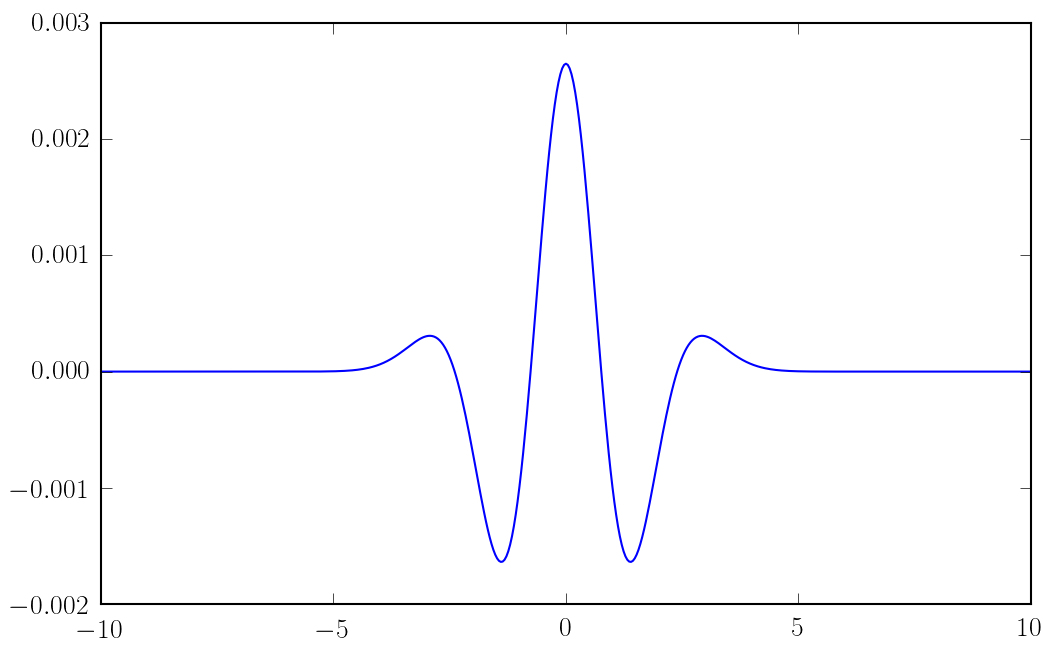

In [15]:
solnVst = np.zeros(N)
v = np.linspace(-10, 10, 501)
pl.plot(v, f2(v, 0.5))

for gridPoint in range(N):
    #print("gridPoint = ",gridPoint)
    integral = quad(pressureIntegrand, -np.inf, np.inf, args = x[gridPoint])
    solnVst[gridPoint]  = integral[0]   


In [16]:
solnVstf0 = np.zeros(N)

for gridPoint in range(N):
    #print("gridPoint = ",gridPoint)
    integral = quad(pressureIntegrandf0, -np.inf, np.inf, args = x[gridPoint])
    solnVstf0[gridPoint]  = integral[0]   


In [17]:
solnVstdf = np.zeros(N)

for gridPoint in range(N):
    #print("gridPoint = ",gridPoint)
    integral = quad(df, -np.inf, np.inf, args = x[gridPoint])
    solnVstdf[gridPoint]  = integral[0]   

[ 1.00234375  1.00390625  1.00546875  1.00703125  1.00859375  1.01015625
  1.01171875  1.01328125  1.01484375  1.01640625  1.01796875  1.01953125
  1.02109375  1.02265625  1.02421875  1.02578125  1.02734375  1.02890625
  1.03046875  1.03203125  1.03359375  1.03515625  1.03671875  1.03828125
  1.03984375  1.04140625  1.04296875  1.04453125  1.04609375  1.04765625
  1.04921875  1.05078125  1.05234375  1.05390625  1.05546875  1.05703125
  1.05859375  1.06015625  1.06171875  1.06328125  1.06484375  1.06640625
  1.06796875  1.06953125  1.07109375  1.07265625  1.07421875  1.07578125
  1.07734375  1.07890625  1.08046875  1.08203125  1.08359375  1.08515625
  1.08671875  1.08828125  1.08984375  1.09140625  1.09296875  1.09453125
  1.09609375  1.09765625]


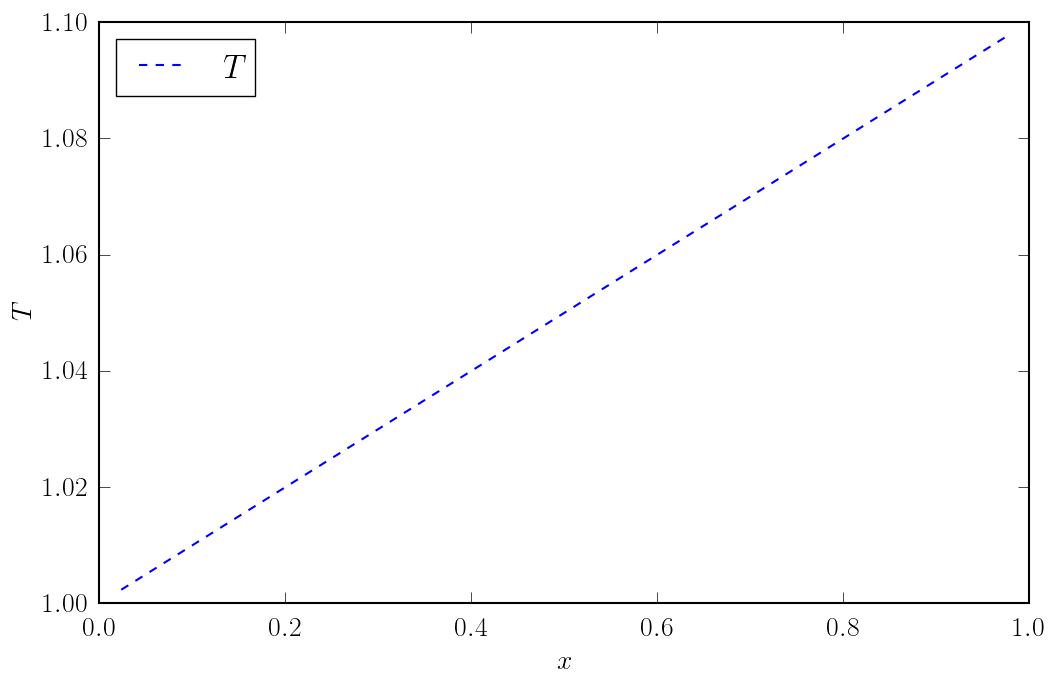

In [18]:
pl.plot(x[1:-1], solnVst[1:-1], '--', label = '$T$')
#pl.plot(x, solnVstf0, label = '$T_0$' )
pl.legend(loc = 'best')
pl.xlabel('$x$')
pl.ylabel('$T$')
print(solnVst[1:-1])

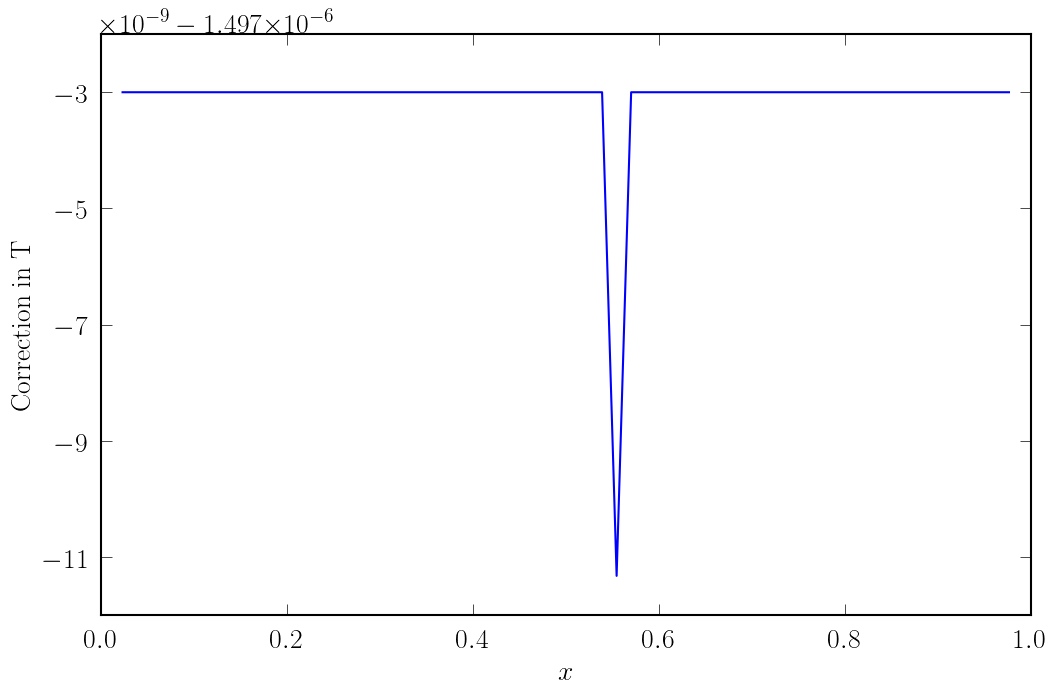

In [19]:
pl.plot(x[1:-1], solnVstdf[1:-1])
pl.xlabel('$x$')
pl.ylabel('$\mathrm{Correction\;in\;T}$')

In [20]:
solnVst[255]

IndexError: index 255 is out of bounds for axis 0 with size 64